In [1]:
import matplotlib

In [2]:
matplotlib.__path__

['C:\\Anaconda\\lib\\site-packages\\matplotlib']

In [3]:
import matplotlib.pyplot as plt

In [5]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is DC73-8865

 Directory of d:\NLP\Week 3

05/15/2019  03:01 AM    <DIR>          .
05/15/2019  03:01 AM    <DIR>          ..
05/15/2019  03:00 AM    <DIR>          .ipynb_checkpoints
05/15/2019  02:52 AM           264,129 assignment-03.ipynb
05/15/2019  03:01 AM             1,208 L03.ipynb
05/15/2019  02:55 AM             6,940 T-Assignment-03.ipynb
04/20/2019  07:21 AM            12,008 Transfer Subway .ipynb
               4 File(s)        284,285 bytes
               3 Dir(s)  70,383,640,576 bytes free


In [11]:
f = open(r'assignment-03.ipynb')

In [7]:
f.readlines()

['{\n',
 ' "cells": [\n',
 '  {\n',
 '   "cell_type": "markdown",\n',
 '   "metadata": {},\n',
 '   "source": [\n',
 '    "## Assignment 03 \\n",\n',
 '    "### Part 3 - Finish the Search Problem\\n",\n',
 '    "Implement a search agent that (a) receives two inpus, one is @param start station and the other is @param destination, and (b) returns the optimal route based on Beijing Subway system.\\n",\n',
 '    "\\n",\n',
 '    "Workflow:\\n",\n',
 '    "1. Get data from webpage (using regular expressions and the \'beatifulsoup\' package) https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485.\\n",\n',
 '    "\\n",\n',
 '    "2. Preprocess data from page source  to build a dictionary (e.g., the \'defaultdict\') or a network graph of subway stations (using the \'networkx\' package).\\n",\n',
 '    "\\n",\n',
 '    "3. Build a search agent with different search strategies.\\n",\n',
 '    ">  possible options for search strategies: (a) shortest path priority(路程最短优先); (b) mi

In [13]:
for line in f.readlines():
    print(line)
### Pay attention to the pointer location!

In [14]:
f.close()

## Generator

In [15]:
import time

In [16]:
def func(i):
    time.sleep(0.2)
    return i

In [17]:
def gene_func():
    yield 1
    yield 2
    yield 3
    yield 4

In [20]:
next(gene_func())

1

In [24]:
def loop(n):
    results = []
    for i in range(n):
        r = func(i)
        results.append(r)
    return results

In [25]:
loop(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [26]:
def loop_with_gene(n):
    for i in range(n):
        r = func(i)
        yield r

In [27]:
G = loop_with_gene(3)

In [28]:
next(G)

0

In [29]:
next(G)

1

In [30]:
next(G)

2

In [31]:
next(G)

StopIteration: 

In [34]:
for i in loop(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [35]:
for i in loop_with_gene(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


## Best First Search

In [38]:
coordination_source = """
{name:'lanzhou', geoCoord:[103.73, 36.03]},
{name:'jiayuguan', geoCoord:[98.17, 39.47]},
{name:'xining', geoCoord:[101.74, 36.56]},
{name:'chengdu', geoCoord:[104.06, 30.67]},
{name:'shijiazhuang', geoCoord:[114.48, 38.03]},
{name:'lasa', geoCoord:[102.73, 25.04]},
{name:'guiyang', geoCoord:[106.71, 26.57]},
{name:'wuhan', geoCoord:[114.31, 30.52]},
{name:'zhengzhou', geoCoord:[113.65, 34.76]},
{name:'jinan', geoCoord:[117, 36.65]},
{name:'nanjing', geoCoord:[118.78, 32.04]},
{name:'hefei', geoCoord:[117.27, 31.86]},
{name:'hangzhou', geoCoord:[120.19, 30.26]},
{name:'nanchang', geoCoord:[115.89, 28.68]},
{name:'fuzhou', geoCoord:[119.3, 26.08]},
{name:'guangzhou', geoCoord:[113.23, 23.16]},
{name:'changsha', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'shengyang', geoCoord:[123.38, 41.8]},
{name:'changchun', geoCoord:[125.35, 43.88]},
{name:'haorbing', geoCoord:[126.63, 45.75]},
{name:'taiyuan', geoCoord:[112.53, 37.87]},
{name:'xian', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'beijing', geoCoord:[116.46, 39.92]},
{name:'shanghai', geoCoord:[121.48, 31.22]},
{name:'chongqing', geoCoord:[106.54, 29.59]},
{name:'tianjing', geoCoord:[117.2, 39.13]},
{name:'huhehaote', geoCoord:[111.65, 40.82]},
{name:'nanning', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'yinchuan', geoCoord:[106.27, 38.47]},
{name:'wulumuqi', geoCoord:[87.68, 43.77]},
{name:'xiangang', geoCoord:[114.17, 22.28]},
{name:'aomen', geoCoord:[113.54, 22.19]}
"""

In [19]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
city_location = {}

In [5]:
city = re.findall("name:'(\w+)'", line)

In [6]:
city

[]

In [4]:
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
   
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
  
    
    city_location[city] = x_y
    print(city, x_y)

    

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [7]:
import math

In [8]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371
    
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d 

In [9]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [10]:
get_city_distance('杭州', '上海')

153.5185697155768

In [11]:
import networkx as nx

In [12]:
cities = list(city_location.keys())

In [13]:
cities

['兰州',
 '嘉峪关',
 '西宁',
 '成都',
 '石家庄',
 '拉萨',
 '贵阳',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '沈阳',
 '长春',
 '哈尔滨',
 '太原',
 '西安',
 '北京',
 '上海',
 '重庆',
 '天津',
 '呼和浩特',
 '南宁',
 '银川',
 '乌鲁木齐',
 '香港',
 '澳门']

In [14]:
city_graph = nx.Graph()

In [15]:
city_graph.add_nodes_from(cities)

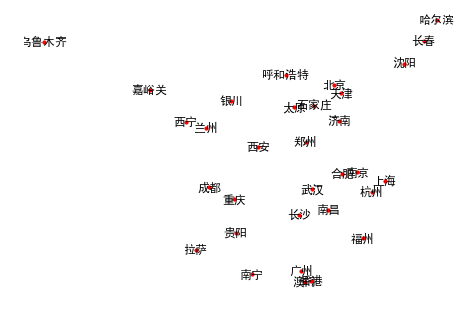

In [22]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [23]:
get_city_distance('西安', '兰州')

582.9782141643079

In [24]:
threshold = 700

In [25]:
from collections import defaultdict

In [26]:
cities_connections = defaultdict(list)

In [27]:
for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
        if get_city_distance(c1, c2) < threshold:
            cities_connections[c1].append(c2)

In [28]:
cities_connections['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [29]:
cities_connections_graph = nx.Graph(cities_connections)

In [30]:
get_city_distance('沈阳', '北京')

776.4154006857316

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


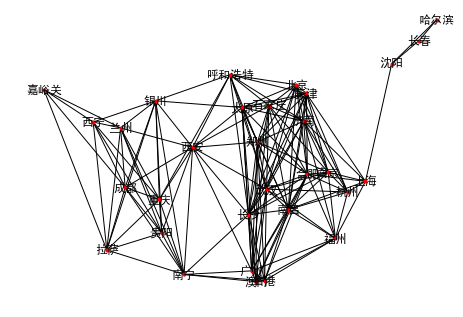

In [31]:
nx.draw(cities_connections_graph, city_location, with_labels=True, node_size=10);

In [77]:
## ？
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [78]:
is_goal('兰州')

<function __main__.is_goal.<locals>._wrap(current_path)>

In [79]:
graph

NameError: name 'graph' is not defined

In [102]:
def search(graph, start, is_goal, search_strategy):
    paths = [[start]]
    seen = set()
    
    while paths:
        path = paths.pop(0)
        
        frontier = path[-1]
        
        if frontier in seen:
            continue
        successors = graph[frontier]
        
        
        for city in successors:
            if city in path:
                continue
            new_path = path + [city]
            
            paths.append(new_path)
                    
            if is_goal(new_path):
                return new_path
            
        seen.add(frontier)
        paths = search_strategy(paths)

In [103]:
#？
def sort_path(cmp_func, beam=-1):
    def _sorted(paths):
        return sorted(paths, key=cmp_func)[:beam]
    return _sorted

In [104]:
search(cities_connections, start='北京', is_goal=is_goal('拉萨'), search_strategy=lambda n: n)

['北京', '长沙', '南宁', '拉萨']

In [87]:
cities_connections

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [94]:
a = ['北京', '长沙', '南宁', '拉萨']
a[:-1]

['北京', '长沙', '南宁']

In [95]:
def get_path_distance(path):
    distance = 0
    
    for i, c in enumerate(path[:-1]):
        distance += get_city_distance(c, path[i+1])
    
    return distance
        

In [96]:
def get_total_station(path):
    return len(path)

In [97]:
def get_comprehensive_path(path):
    return get_path_distance(path) + get_total_station(path)

In [98]:
def get_as_much_path(path):
    return -1 * len(path)

In [99]:
get_path_distance(['北京', '长沙'])

665.2271362574077

In [122]:
#？？？
search(cities_connections, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_path_distance, beam = 10))

In [106]:

search(cities_connections, start='北京', is_goal=is_goal('西安'), search_strategy=sort_path(get_total_station))

['北京', '石家庄', '西安']

In [107]:
search(cities_connections, start='杭州', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_total_station))

['杭州', '武汉', '广州', '南宁', '拉萨']

In [108]:
search(cities_connections, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_comprehensive_path))

['北京', '呼和浩特', '银川', '拉萨']

In [109]:

search(cities_connections, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(get_as_much_path))

['北京',
 '石家庄',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '太原',
 '西安',
 '兰州',
 '拉萨']